## Data Cleanup

In [1]:
!pip install \
    pandas>=2.0.0 \
    numpy>=1.24.0 \
    matplotlib>=3.7.0 \
    seaborn>=0.12.0 \
    plotly>=5.15.0 \
    scikit-learn>=1.3.0 \
    scipy>=1.11.0 \
    jupyterlab>=4.0.0 \
    notebook>=7.0.0 \
    ipykernel>=6.25.0 \
    tqdm>=4.66.0 \
    openpyxl>=3.1.0 \
    xlrd>=2.0.1

In [2]:
!pip install streamlit>=1.28.0 dash>=2.14.0

In [3]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine learning & clustering (for segmentation)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Utilities
from tqdm import tqdm  # For progress bars
import warnings
warnings.filterwarnings('ignore')

# Display settings for better visuals
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')


In [5]:
# Load the Firebase overview dataset
firebase_path = "firebase_overview.csv"  # adjust path if needed
firebase_df = pd.read_csv(firebase_path)

# Preview the first few rows
firebase_df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,# Firebase overview,NaN,NaN,NaN,NaN,NaN,NaN
1,# ----------------------------------------,NaN,NaN,NaN,NaN,NaN,NaN
2,# How are active users trending?,NaN,NaN,NaN,NaN,NaN,NaN
3,# Start date: 20250801,NaN,NaN,NaN,NaN,NaN,NaN
4,# End date: 20250831,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Identify and separate data sections based on header markers
sections = {}
current_section = None
current_data = []

for _, row in firebase_df.iterrows():
    first_col = str(row[firebase_df.columns[0]])
    
    if first_col.startswith("# "):
        # Save previous section
        if current_section and current_data:
            sections[current_section] = pd.DataFrame(current_data).reset_index(drop=True)
            current_data = []
        # Define new section title
        current_section = first_col.replace("# ", "").strip()
    else:
        if current_section:
            current_data.append(row.tolist())

# Save last section if it exists
if current_section and current_data:
    sections[current_section] = pd.DataFrame(current_data).reset_index(drop=True)

# Display detected sections
print("Detected sections and row counts:\n")
for name, data in sections.items():
    print(f"{name}: {data.shape[0]} rows")


Detected sections and row counts:

End date: 20250831: 2372 rows
End date: 20250830: 5 rows
End date: 20250927: 8 rows


In [7]:
# Select the main Firebase dataset (largest section)
main_section = sections["End date: 20250831"].copy()

# Display a few non-empty rows to see what the content looks like
main_section = main_section.dropna(how='all')
main_section.head(20)

,0,1,2,3,4,5,6
0,Device model,Active users,NaN,NaN,NaN,NaN,NaN
1,SM-A055F,1813,NaN,NaN,NaN,NaN,NaN
2,SM-A065F,668,NaN,NaN,NaN,NaN,NaN
3,SM-A032F,650,NaN,NaN,NaN,NaN,NaN
4,2409BRN2CA,547,NaN,NaN,NaN,NaN,NaN
5,BF6,504,NaN,NaN,NaN,NaN,NaN
6,KL4,480,NaN,NaN,NaN,NaN,NaN
7,X6525,416,NaN,NaN,NaN,NaN,NaN
8,SM-A042F,396,NaN,NaN,NaN,NaN,NaN
9,KJ5,378,NaN,NaN,NaN,NaN,NaN


In [8]:
# Keep only non-empty rows and relevant columns
device_df = main_section[[0, 1]].dropna().reset_index(drop=True)

# Set the first row as header (Device model | Active users)
device_df.columns = device_df.iloc[0]
device_df = device_df[1:].reset_index(drop=True)

# Convert active users column to numeric
device_df["Active users"] = device_df["Active users"].astype(int)

# Display the clean table
device_df.head(10)

,Device model,Active users
0,SM-A055F,1813
1,SM-A065F,668
2,SM-A032F,650
3,2409BRN2CA,547
4,BF6,504
5,KL4,480
6,X6525,416
7,SM-A042F,396
8,KJ5,378
9,BG6m,365


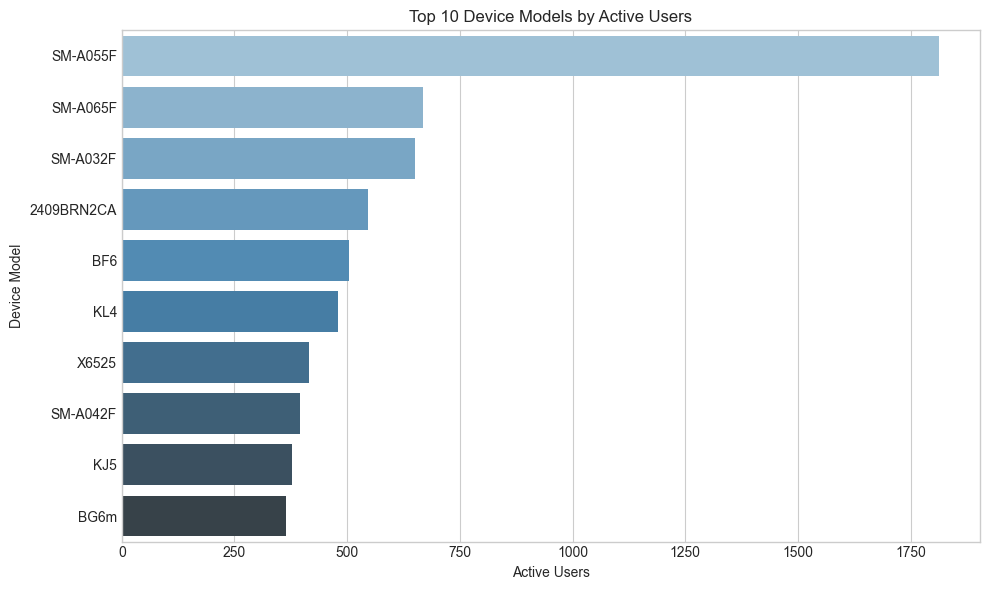

Chart saved successfully to: images/top_10_devices_active_users.png


In [12]:
import os

# Ensure the images folder exists
os.makedirs("images", exist_ok=True)

# Sort and select top 10 devices by active users
top_devices = device_df.sort_values("Active users", ascending=False).head(10)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_devices, x="Active users", y="Device model", palette="Blues_d")

plt.title("Top 10 Device Models by Active Users")
plt.xlabel("Active Users")
plt.ylabel("Device Model")
plt.tight_layout()

# Save the figure to the images folder
plot_path = "images/top_10_devices_active_users.png"
plt.savefig(plot_path, dpi=300)

# Display the plot
plt.show()

print(f"Chart saved successfully to: {plot_path}")

In [27]:
# Jump further to locate the next metric section (could start after 2000)
main_section.iloc[50:2400]

,0,1,2,3,4,5,6
50,X6531B,94,NaN,NaN,NaN,NaN,NaN
51,CG6,93,NaN,NaN,NaN,NaN,NaN
52,JKM-LX1,93,NaN,NaN,NaN,NaN,NaN
53,SM-A022F,90,NaN,NaN,NaN,NaN,NaN
54,KI7,86,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2367,moto g(7) optimo maxx(XT1955DL),1,NaN,NaN,NaN,NaN,NaN
2368,moto g(8) plus,1,NaN,NaN,NaN,NaN,NaN
2369,moto g15,1,NaN,NaN,NaN,NaN,NaN
2370,moto g23,1,NaN,NaN,NaN,NaN,NaN


In [21]:
# Inspect the top 40 rows to locate summary metrics
firebase_df.head(40)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,# Firebase overview,NaN,NaN,NaN,NaN,NaN,NaN
1,# ----------------------------------------,NaN,NaN,NaN,NaN,NaN,NaN
2,# How are active users trending?,NaN,NaN,NaN,NaN,NaN,NaN
3,# Start date: 20250801,NaN,NaN,NaN,NaN,NaN,NaN
4,# End date: 20250831,NaN,NaN,NaN,NaN,NaN,NaN
5,Nth day,30 days,7 days,1 day,NaN,NaN,NaN
6,0,21818,9009,2109,NaN,NaN,NaN
7,1,22539,9068,2178,NaN,NaN,NaN
8,2,23237,9213,2177,NaN,NaN,NaN
9,3,23760,9462,2022,NaN,NaN,NaN


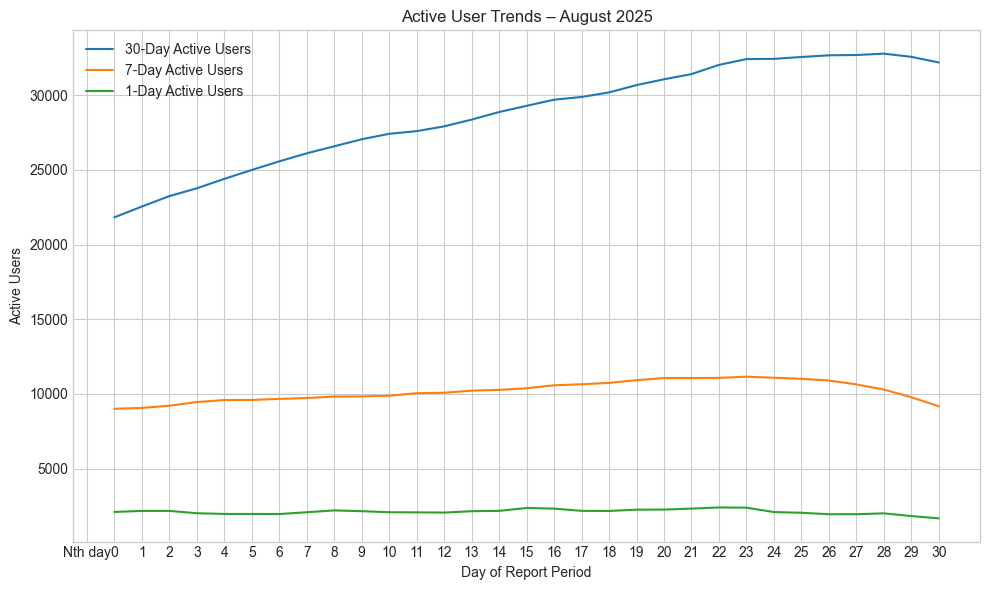

Chart saved successfully to: images/active_user_trends.png


In [23]:
# Ensure an images folder exists
os.makedirs("images", exist_ok=True)

plt.figure(figsize=(10,6))
sns.lineplot(data=active_users_df, x="Nth day", y="30 days", label="30-Day Active Users")
sns.lineplot(data=active_users_df, x="Nth day", y="7 days", label="7-Day Active Users")
sns.lineplot(data=active_users_df, x="Nth day", y="1 day", label="1-Day Active Users")

plt.title("Active User Trends – August 2025")
plt.xlabel("Day of Report Period")
plt.ylabel("Active Users")
plt.legend()
plt.tight_layout()

plot_path = "images/active_user_trends.png"
plt.savefig(plot_path, dpi=300)
plt.show()

print(f"Chart saved successfully to: {plot_path}")

In [24]:
# Remove the duplicate header row
active_users_df = active_users_df[active_users_df["Nth day"] != "Nth day"]

# Convert Nth day back to numeric for plotting
active_users_df["Nth day"] = pd.to_numeric(active_users_df["Nth day"], errors="coerce")

# Confirm cleanup worked
active_users_df.head()

,Nth day,30 days,7 days,1 day
1,0,21818.0,9009.0,2109.0
2,1,22539.0,9068.0,2178.0
3,2,23237.0,9213.0,2177.0
4,3,23760.0,9462.0,2022.0
5,4,24392.0,9597.0,1976.0


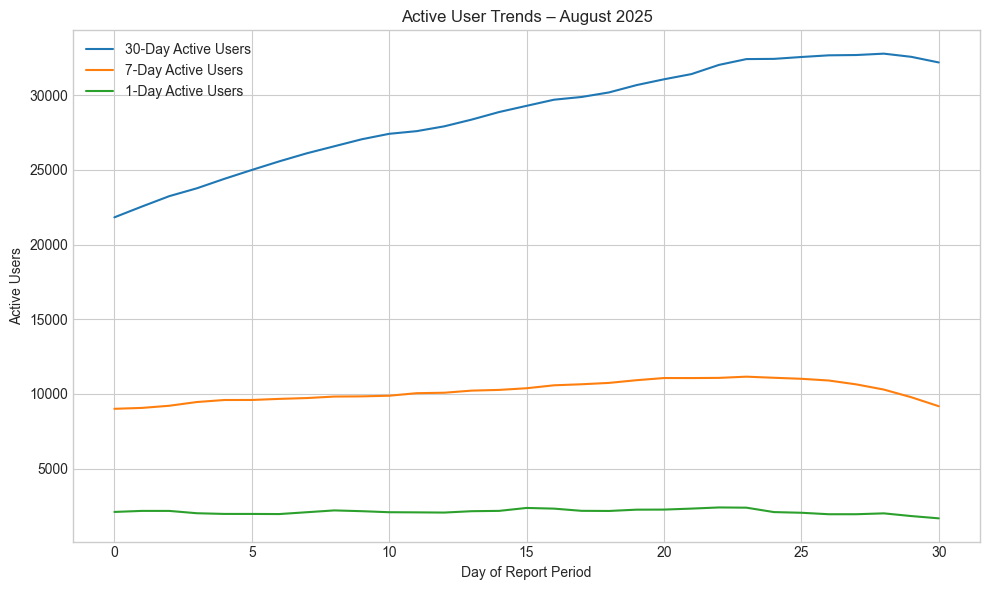

Chart saved successfully to: images/active_user_trends.png


In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(data=active_users_df, x="Nth day", y="30 days", label="30-Day Active Users")
sns.lineplot(data=active_users_df, x="Nth day", y="7 days", label="7-Day Active Users")
sns.lineplot(data=active_users_df, x="Nth day", y="1 day", label="1-Day Active Users")

plt.title("Active User Trends – August 2025")
plt.xlabel("Day of Report Period")
plt.ylabel("Active Users")
plt.legend()
plt.tight_layout()

plot_path = "images/active_user_trends.png"
plt.savefig(plot_path, dpi=300)
plt.show()

print(f"Chart saved successfully to: {plot_path}")

In [26]:
# Create the /data/processed folder if it doesn't exist
os.makedirs("data/processed", exist_ok=True)

# Save cleaned datasets
active_users_df.to_csv("data/processed/active_users.csv", index=False)
device_df.to_csv("data/processed/device_models.csv", index=False)

print("Cleaned data saved to 'data/processed/' folder.")

Cleaned data saved to 'data/processed/' folder.
